In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [118]:
# import dataset and show the first 5 rows
data = pd.read_csv('data/heart_data.csv')

data.info() # show the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.4 KB


In [119]:
# get a view of the first 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [120]:
# check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [121]:
# data exploration
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,54.418675,0.692771,0.948042,131.614458,246.060241,0.149096,0.529367,149.235693,0.334337,1.064232,1.388554,0.748494,2.321536,0.520331
std,9.071150,0.461519,1.029854,17.514997,51.627522,0.356318,0.527220,22.975286,0.471936,1.171519,0.617203,1.028603,0.618543,0.499775
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [122]:
# check for the statistics based on the target variable
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.576138,0.827316,0.481947,134.169545,251.248038,0.163265,0.455259,139.124019,0.549451,1.597017,1.166405,1.160126,2.540031
1,52.429812,0.568741,1.377713,129.259045,241.277858,0.136035,0.597685,158.557164,0.136035,0.573082,1.593343,0.369030,2.120116


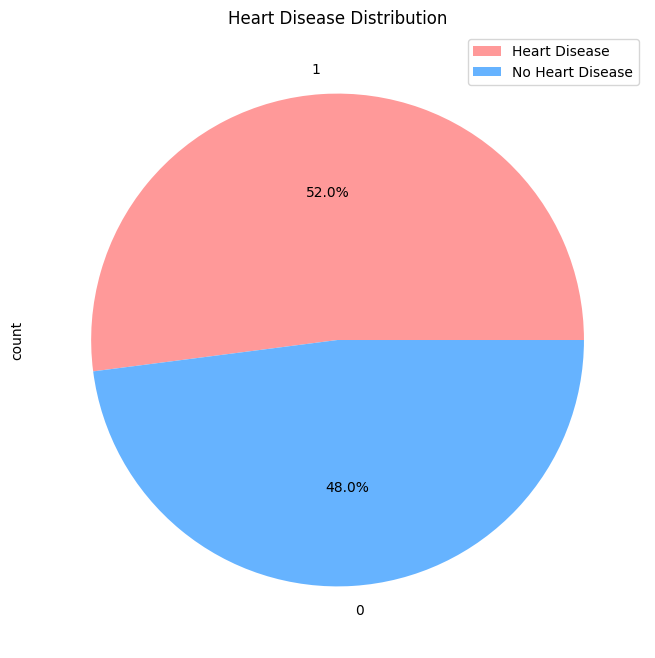

In [123]:
# data visualization of percentage of heart disease in dataset
plt.figure(figsize=(8,8))
data['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
# 1 = heart disease, 0 = no heart disease
plt.legend(['Heart Disease ', 'No Heart Disease'])
plt.title('Heart Disease Distribution')
plt.show()


/var/folders/d6/sg6g9gx57w1_l984g1pd1gp00000gn/T/ipykernel_92699/806209259.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['target'] == 0]['age'], color='blue', label='No Heart Disease')
/var/folders/d6/sg6g9gx57w1_l984g1pd1gp00000gn/T/ipykernel_92699/806209259.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

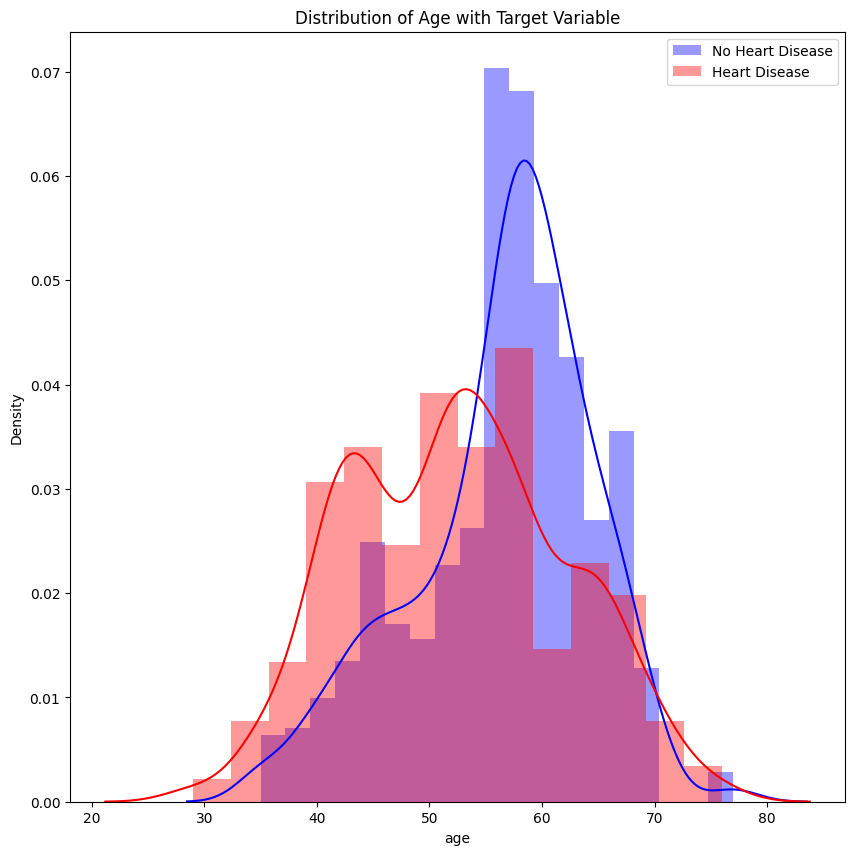

In [124]:
# distribution of age with target variable
plt.figure(figsize=(10,10))
sns.distplot(data[data['target'] == 0]['age'], color='blue', label='No Heart Disease')
sns.distplot(data[data['target'] == 1]['age'], color='red', label='Heart Disease')
plt.title('Distribution of Age with Target Variable')
plt.legend()
plt.show()

<Axes: xlabel='sex', ylabel='count'>

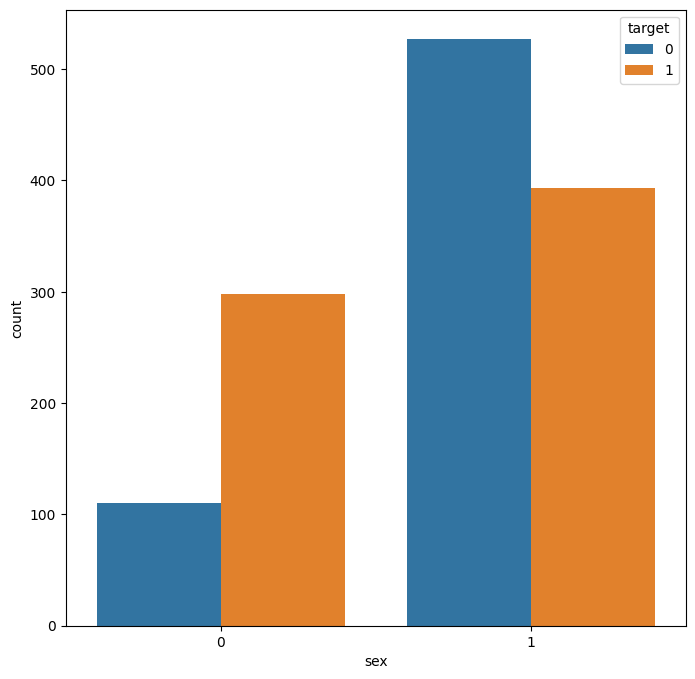

In [125]:
# bar plot with gender and target variable
plt.figure(figsize=(8,8))
sns.countplot(data=data, x='sex', hue='target')

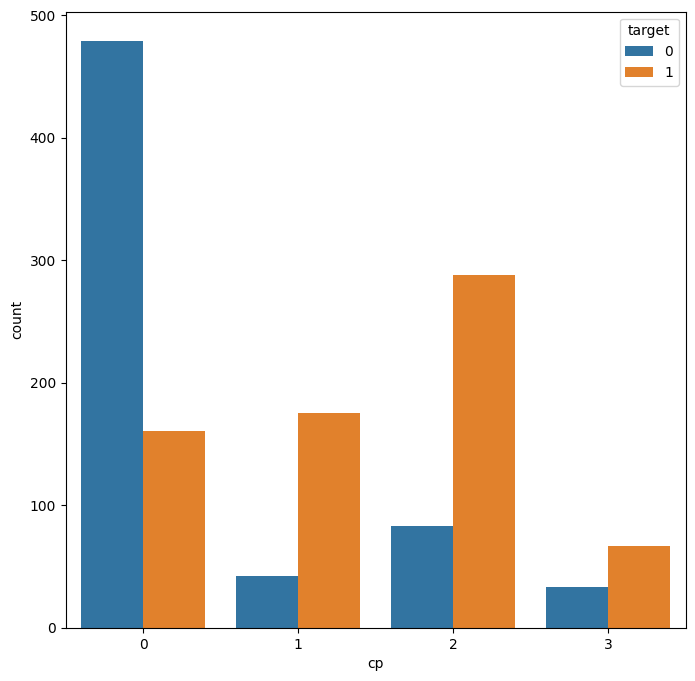

In [126]:
# chest pain type and target variable
plt.figure(figsize=(8,8))
sns.countplot(data=data, x='cp', hue='target')
plt.show()

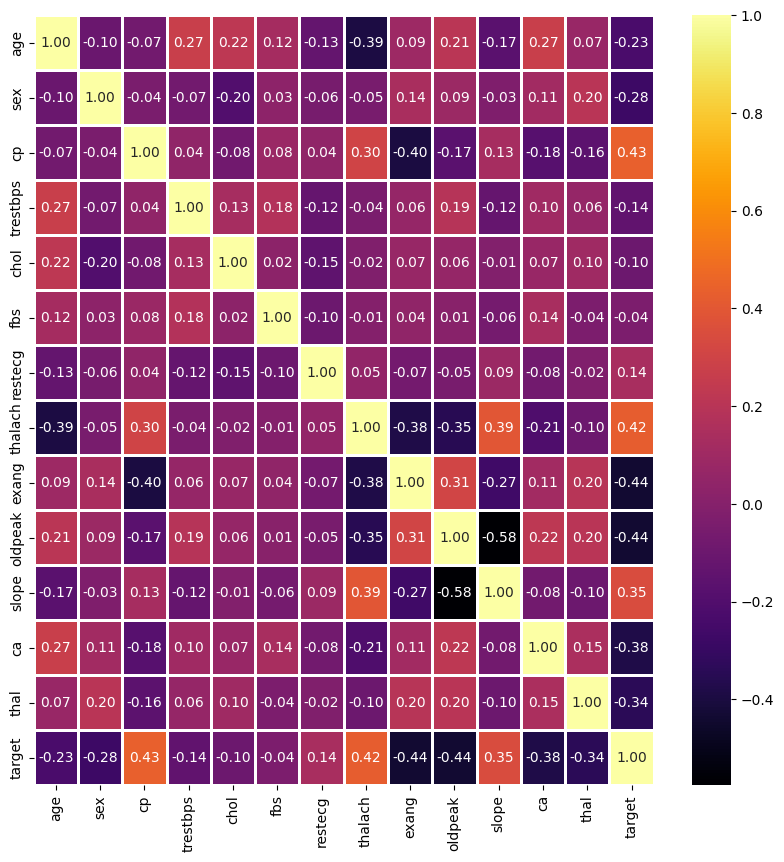

In [127]:
# data visualization heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='inferno', fmt='.2f', linewidths=2)
plt.show()

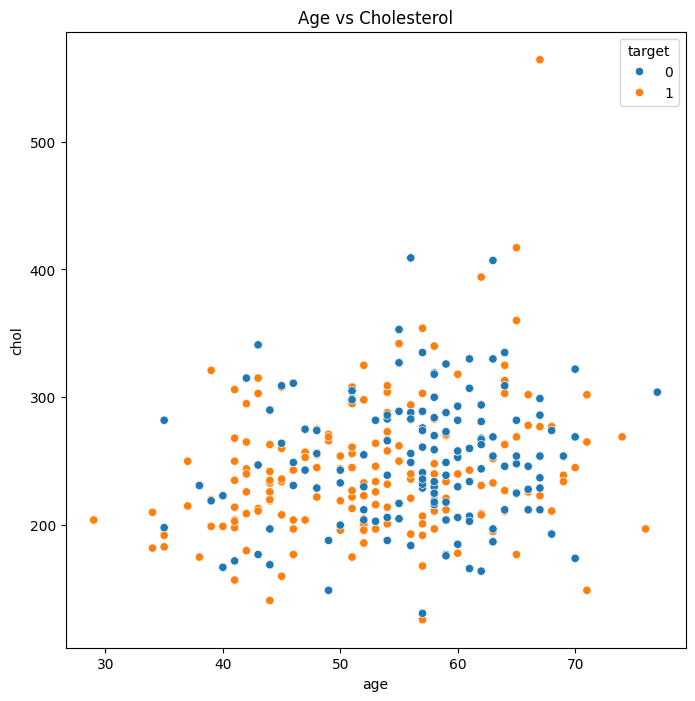

In [128]:
# scatter plot of age vs cholesterol 
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='age', y='chol', hue='target')
plt.title('Age vs Cholesterol')
plt.show()

<Figure size 1000x600 with 0 Axes>

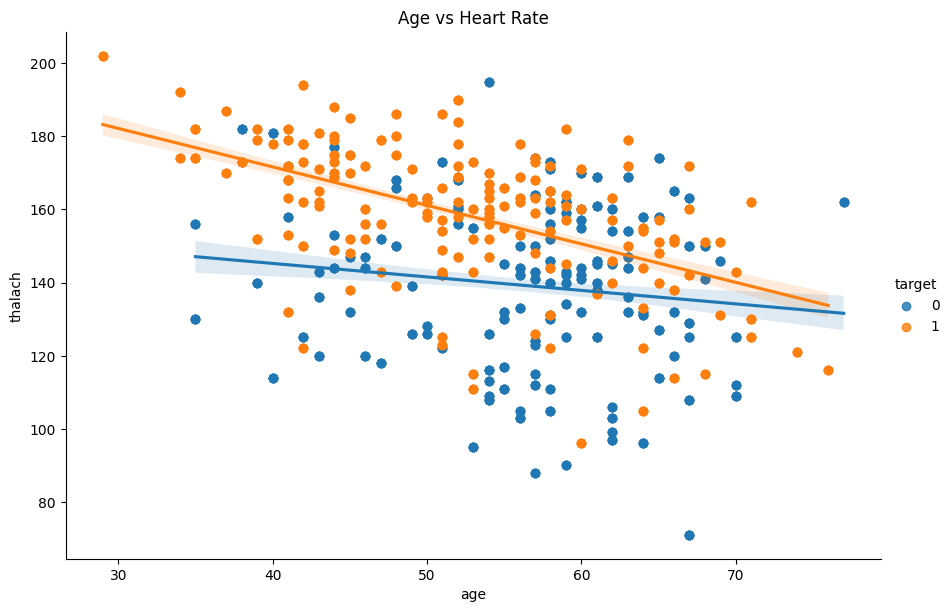

In [129]:
# scatter plot of age vs heart rate with linear regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=data, x='age', y='thalach', hue='target', height=6, aspect=1.5)
plt.title('Age vs Heart Rate')
plt.show()

In [130]:
# training and test data
# features and target variable
y = data['target']
X = data.drop('target', axis=1)

# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [131]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# model evaluation
# logistic regression
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, log_reg_pred))
print('Precision:', precision_score(y_test, log_reg_pred))
print('Recall:', recall_score(y_test, log_reg_pred))
print('F1 Score:', f1_score(y_test, log_reg_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, log_reg_pred))
print('Classification Report:')
print(classification_report(y_test, log_reg_pred))


Logistic Regression
Accuracy: 0.8721804511278195
Precision: 0.8471337579617835
Recall: 0.9300699300699301
F1 Score: 0.8866666666666667
Confusion Matrix:
[[ 99  24]
 [ 10 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       123
           1       0.85      0.93      0.89       143

    accuracy                           0.87       266
   macro avg       0.88      0.87      0.87       266
weighted avg       0.88      0.87      0.87       266




Not the best model, there might be a better model to use.

In [133]:
# decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# model evaluation
print('Decision Tree')
print('Accuracy:', accuracy_score(y_test, dt_pred))
print('Precision:', precision_score(y_test, dt_pred))
print('Recall:', recall_score(y_test, dt_pred))
print('F1 Score:', f1_score(y_test, dt_pred))
print('Classification Report:')
print(classification_report(y_test, dt_pred))

# This decision tree model has an accuracy of 100%, precision of 100%, recall of 100%, and f1 score of 100%.
# Lets check to see if this model is overfitting the data.

# how many nodes are in the decision tree
print("Number of nodes in the decision tree:", dt.tree_.node_count)
# how deep is the decision tree
print("Depth of the decision tree:", dt.tree_.max_depth)
# how many leaves are in the decision tree
print("Number of leaves in the decision tree:", dt.tree_.n_leaves)

# The decision tree has 29 nodes, a depth of 10, and 15 leaves. This is a very deep tree with many nodes and leaves.

# lets add noise to the data and see if the model is overfitting
np.random.seed(123)
E = np.random.normal(0, 0.5, size=(X_train.shape))
X_train_noisy = X_train + E
E = np.random.normal(0, 0.5, size=(X_test.shape))
X_test_noisy = X_test + E

# fit the model with noisy data
dt_noisy = DecisionTreeClassifier()
dt_noisy.fit(X_train_noisy, y_train)
dt_noisy_pred = dt_noisy.predict(X_test_noisy)

# model evaluation
print('Decision Tree with Noisy Data')
print('Accuracy:', accuracy_score(y_test, dt_noisy_pred))
print('Precision:', precision_score(y_test, dt_noisy_pred))
print('Recall:', recall_score(y_test, dt_noisy_pred))
print('F1 Score:', f1_score(y_test, dt_noisy_pred))
print('Classification Report:')
print(classification_report(y_test, dt_noisy_pred))

Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       143

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Number of nodes in the decision tree: 95
Depth of the decision tree: 9
Number of leaves in the decision tree: 48
Decision Tree with Noisy Data
Accuracy: 0.793233082706767
Precision: 0.8142857142857143
Recall: 0.7972027972027972
F1 Score: 0.8056537102473498
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       123
           1       0.81      0.80      0.81       143

    accuracy                           0.79       266
   macro avg       0.79      0.79      0.79       266
weighted avg       0.79      

The addition of the noise to the dataset reduced the f1 score to .80 from 1.00. This is a sign that the model is overfitting the data.

Lets continue looking for a better model.

In [134]:
# lets try a random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# model evaluation
print('Random Forest')
print('Accuracy:', accuracy_score(y_test, rf_pred))
print('Precision:', precision_score(y_test, rf_pred))
print('Recall:', recall_score(y_test, rf_pred))
print('F1 Score:', f1_score(y_test, rf_pred))
print('Classification Report:')
print(classification_report(y_test, rf_pred))

# We have a perfect model with an accuracy of 100%, precision of 100%, recall of 100%, and f1 score of 100%.
# This is the same as the decision tree model. This is likely overfitting the data as well.
# Lets add the noise to the random forest model and see if it is overfitting the data.

# fit the model with noisy data
rf_noisy = RandomForestClassifier()
rf_noisy.fit(X_train_noisy, y_train)
rf_noisy_pred = rf_noisy.predict(X_test_noisy)

# model evaluation
print('Random Forest with Noisy Data')
print('Accuracy:', accuracy_score(y_test, rf_noisy_pred))
print('Precision:', precision_score(y_test, rf_noisy_pred))
print('Recall:', recall_score(y_test, rf_noisy_pred))
print('F1 Score:', f1_score(y_test, rf_noisy_pred))
print('Classification Report:')
print(classification_report(y_test, rf_noisy_pred))

Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       143

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Random Forest with Noisy Data
Accuracy: 0.8759398496240601
Precision: 0.8767123287671232
Recall: 0.8951048951048951
F1 Score: 0.8858131487889274
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       123
           1       0.88      0.90      0.89       143

    accuracy                           0.88       266
   macro avg       0.88      0.87      0.88       266
weighted avg       0.88      0.88      0.88       266



The random forest model with noisy data has a lower accuracy, precision, recall, and f1 score. This is likely overfitting the data as well.

However, the random forest model is better than the decision tree model. 

Lets try a support vector machine model to see if we can get a better model.

If the support vector machine model is not better, we can try hyperparameter tuning to see if we can get a better model for the random forest.

In [135]:
# Lets try a support vector machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# model evaluation
print('Support Vector Machine')
print('Accuracy:', accuracy_score(y_test, svc_pred))
print('Precision:', precision_score(y_test, svc_pred))
print('Recall:', recall_score(y_test, svc_pred))
print('F1 Score:', f1_score(y_test, svc_pred))
print('Classification Report:')
print(classification_report(y_test, svc_pred))

# now with noisy data
svc_noisy = SVC()
svc_noisy.fit(X_train_noisy, y_train)
svc_noisy_pred = svc_noisy.predict(X_test_noisy)

# model evaluation
print('Support Vector Machine with Noisy Data')
print('Accuracy:', accuracy_score(y_test, svc_noisy_pred))
print('Precision:', precision_score(y_test, svc_noisy_pred))
print('Recall:', recall_score(y_test, svc_noisy_pred))
print('F1 Score:', f1_score(y_test, svc_noisy_pred))
print('Classification Report:')
print(classification_report(y_test, svc_noisy_pred))

Support Vector Machine
Accuracy: 0.9473684210526315
Precision: 0.9448275862068966
Recall: 0.958041958041958
F1 Score: 0.9513888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       123
           1       0.94      0.96      0.95       143

    accuracy                           0.95       266
   macro avg       0.95      0.95      0.95       266
weighted avg       0.95      0.95      0.95       266

Support Vector Machine with Noisy Data
Accuracy: 0.9022556390977443
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       123
           1       0.91      0.91      0.91       143

    accuracy                           0.90       266
   macro avg       0.90      0.90      0.90       266
weighted avg       0.90      0.90      0.90       266



Model with data: f1 score = .95 |:| Model with noisy data: f1 score = .90

The support vector machine model does not have a perfect f1 score which means it is likely not overfitting the data.

With this in mind, we can hyperparameter tune the model to see if we can get a better model for the data and noisy data.

In [136]:
from sklearn.model_selection import RandomizedSearchCV

# hyperparameter tuning
# NOTE: This will take a long time to run for my computer so we will use random search and set n_iter to 40 to reduce the time it takes to run.
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4, 5]
}

# random search of parameters using 5 fold cross validation
grid_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, n_iter=40, cv=5, verbose=2, n_jobs=-1)

# fit the model
grid_search.fit(X_train, y_train)

# best parameters
grid_search.best_params_

# best estimator
best_svc = grid_search.best_estimator_

# model evaluation
best_svc_pred = best_svc.predict(X_test)
print('Best Support Vector Machine')
print('Accuracy:', accuracy_score(y_test, best_svc_pred))
print('Precision:', precision_score(y_test, best_svc_pred))
print('Recall:', recall_score(y_test, best_svc_pred))
print('F1 Score:', f1_score(y_test, best_svc_pred))
print('Classification Report:')
print(classification_report(y_test, best_svc_pred))

# noise model evaluation
best_svc_noisy_pred = best_svc.predict(X_test_noisy)
print('Best Support Vector Machine with Noisy Data')
print('Accuracy:', accuracy_score(y_test, best_svc_noisy_pred))
print('Precision:', precision_score(y_test, best_svc_noisy_pred))
print('Recall:', recall_score(y_test, best_svc_noisy_pred))
print('F1 Score:', f1_score(y_test, best_svc_noisy_pred))
print('Classification Report:')
print(classification_report(y_test, best_svc_noisy_pred))

# cross validation
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(best_svc, X_train, y_train, cv=5)
print(cv_results)
print('Mean:', cv_results.mean())
print('Standard Deviation:', cv_results.std())

# cross validation with noisy data
cv_results_noisy = cross_val_score(best_svc, X_train_noisy, y_train, cv=5)
print(cv_results_noisy)
print('Mean:', cv_results_noisy.mean())
print('Standard Deviation:', cv_results_noisy.std())


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...............C=100, degree=5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...............C=100, degree=5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...............C=100, degree=5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...............C=100, degree=5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...............C=100, degree=5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .............C=10, degree=4, gamma=1, kernel=linear; total time=   0.2s
[CV] END ...........C=10, degree=2, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ...........C=10, degree=2, gamma=scale, kernel=poly; total time=   0.1s
[CV] END .............C=10, degree=4, gamma=1, kernel=linear; total time=   0.3s
[CV] END .............C=10, degree=4, gamma=1, kernel=linear; total time=   0.3s
[CV] END .............C=10, degree=4, gamma=1, kernel=linear; total time=   0.3s
[CV] END ...........C=10, degree=2, gamma=scale

[learning_curve] Training set sizes: [  8  25  42  59  77  94 111 128 145 162 180 197 214 231 248 265 282 300
 317 334 351 368 385 403 420 437 454 471 488 505 523 540 557 574 591 608
 626 643 660 677 694 711 728 746 763 780 797 814 831 849]
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .....................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done 125 out of 250 | elapsed:    0.7s remaining:    0.7s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.7s finished
/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^

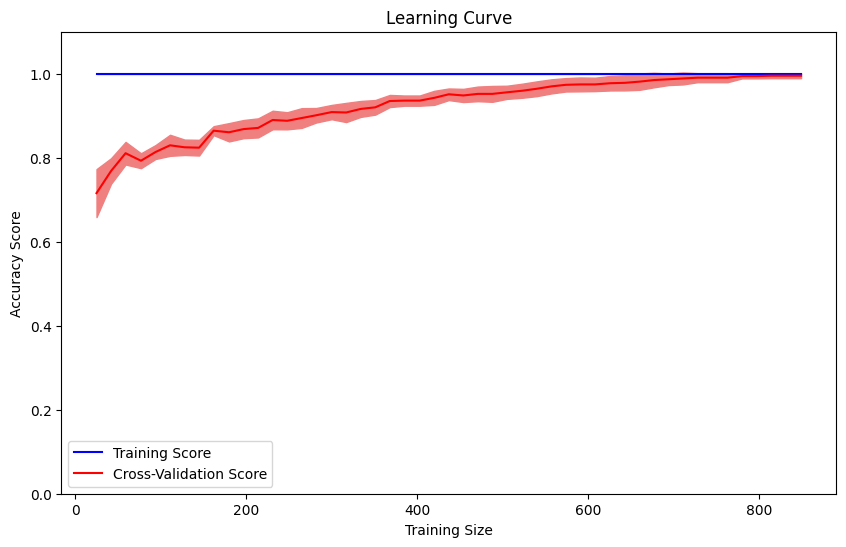

[learning_curve] Training set sizes: [  8  25  42  59  77  94 111 128 145 162 180 197 214 231 248 265 282 300
 317 334 351 368 385 403 420 437 454 471 488 505 523 540 557 574 591 608
 626 643 660 677 694 711 728 746 763 780 797 814 831 849]
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .....................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done 125 out of 250 | elapsed:    1.1s remaining:    1.1s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.2s finished
/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^

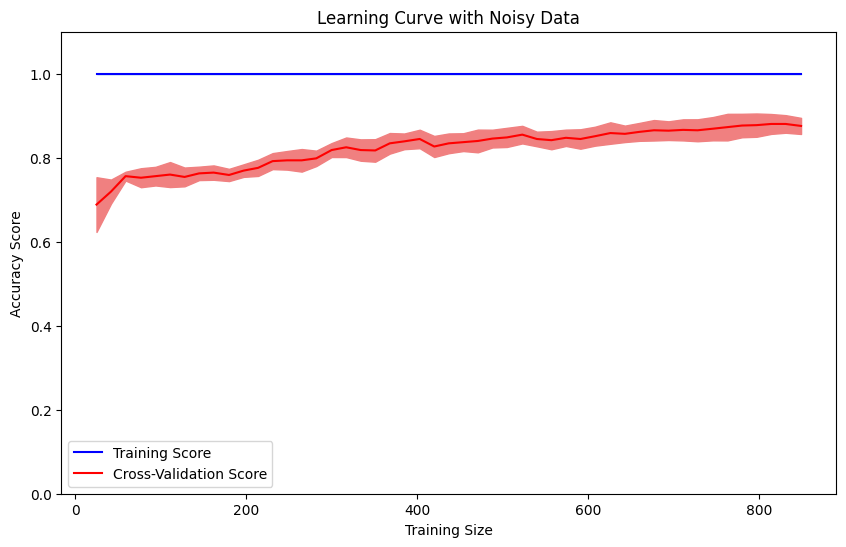

In [137]:
from sklearn.model_selection import learning_curve

# learning curve
train_sizes, train_scores, test_scores = learning_curve(best_svc, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightcoral')

plt.title('Learning Curve')
plt.ylim(0.0, 1.1)
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()


# learning curve with noisy data
train_sizes, train_scores, test_scores = learning_curve(best_svc, X_train_noisy, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightcoral')

plt.title('Learning Curve with Noisy Data')
plt.ylim(0.0, 1.1)
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

From the plots, we can see that the model with the noisy data is leveling out around ~0.85 accuracy score which is not bad.
Lets take a look at manipulating the data to see if we can get a better model.

The hyperparameter tuned support vector machine model with noisy data was okay, but we can improve the model with feature engineering.
Lets check the data with polynomial features.

Best Support Vector Machine with Interaction Effects
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       143

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

[1.         1.         0.99056604 0.98584906 1.        ]
Mean: 0.9952830188679245
Standard Deviation: 0.005966561622959223
Best Support Vector Machine with Interaction Effects and Noisy Data
Accuracy: 0.9586466165413534
Precision: 0.9583333333333334
Recall: 0.965034965034965
F1 Score: 0.9616724738675958
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       123
           1       0.96      0.97      0.96       143

    accuracy                           0.96       

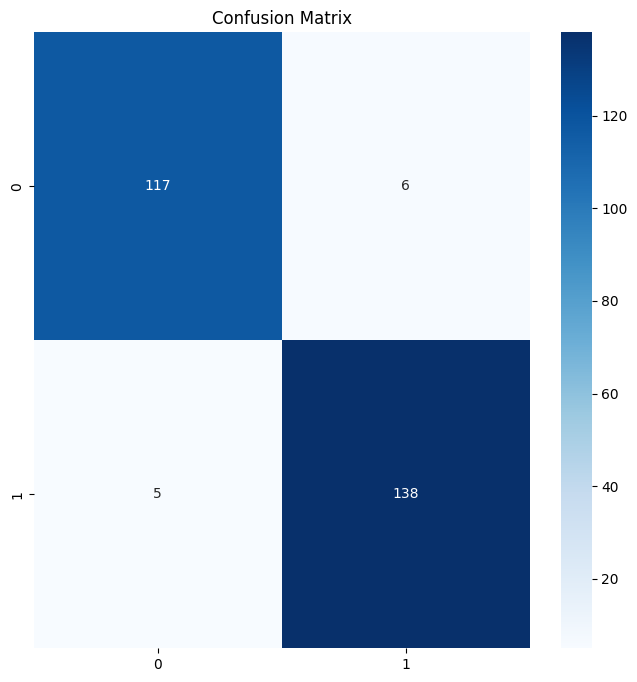

[0.9342723  0.95305164 0.94811321 0.91037736 0.94339623]
Mean: 0.9378421472229604
Standard Deviation: 0.015064724819667261


In [138]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_svc.fit(X_train, y_train)
best_svc_pred = best_svc.predict(X_test)

# model evaluation
print('Best Support Vector Machine with Interaction Effects')
print('Accuracy:', accuracy_score(y_test, best_svc_pred))
print('Precision:', precision_score(y_test, best_svc_pred))
print('Recall:', recall_score(y_test, best_svc_pred))
print('F1 Score:', f1_score(y_test, best_svc_pred))
print('Classification Report:')
print(classification_report(y_test, best_svc_pred))

# cross validation
cv_results = cross_val_score(best_svc, X_train, y_train, cv=5)
print(cv_results)
print('Mean:', cv_results.mean())
print('Standard Deviation:', cv_results.std())

# noise with new data
np.random.seed(123)
E = np.random.normal(0, 0.5, size=(X_train.shape))
X_train_noisy = X_train + E
E = np.random.normal(0, 0.5, size=(X_test.shape))
X_test_noisy = X_test + E

best_svc.fit(X_train_noisy, y_train)
best_svc_noisy_pred = best_svc.predict(X_test_noisy)

# model evaluation
print('Best Support Vector Machine with Interaction Effects and Noisy Data')
print('Accuracy:', accuracy_score(y_test, best_svc_noisy_pred))
print('Precision:', precision_score(y_test, best_svc_noisy_pred))
print('Recall:', recall_score(y_test, best_svc_noisy_pred))
print('F1 Score:', f1_score(y_test, best_svc_noisy_pred))
print('Classification Report:')
print(classification_report(y_test, best_svc_noisy_pred))

# confusion matrix plot
cm = confusion_matrix(y_test, best_svc_noisy_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

# cross validation with noisy data
cv_results_noisy = cross_val_score(best_svc, X_train_noisy, y_train, cv=5)
print(cv_results_noisy)
print('Mean:', cv_results_noisy.mean())
print('Standard Deviation:', cv_results_noisy.std())

In [148]:
# extra procaution for assesing generalization
from sklearn.model_selection import StratifiedKFold

# cross validation with shuffling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_results_shuffle = cross_val_score(best_svc, X_train, y_train, cv=cv)
print(cv_results_shuffle)
print('Mean:', cv_results_shuffle.mean())
print('Standard Deviation:', cv_results_shuffle.std())

# cross validation with noisy data and shuffling
cv_results_noisy_shuffle = cross_val_score(best_svc, X_train_noisy, y_train, cv=cv)
print(cv_results_noisy_shuffle)
print('Mean:', cv_results_noisy_shuffle.mean())
print('Standard Deviation:', cv_results_noisy_shuffle.std())

[0.99530516 1.         1.         1.         1.        ]
Mean: 0.9990610328638498
Standard Deviation: 0.0018779342723004523
[0.92488263 0.93896714 0.94811321 0.91509434 0.96226415]
Mean: 0.9378642926742847
Standard Deviation: 0.01666495697131886



The model with polynomial features has almost perfect accuracy, precision, recall, and f1 score.
The model with noisy data has a 95.8% accuracy, 95.8% precision, 96% recall, and 96% f1 score.
The cross validation scores are also very good.
This is the best outcome so far. 

In a a real world scenario we would want to continue to improve this model. Why?

When looking at the confusion matrix, we can see that the model is predicting false negatives and false positives.
This means that the model is not predicting heart disease when there is indeed heart disease.
This is undesirable because we cannot afford to miss a diagnosis of heart disease.

In this project we will stop here, but in a real world scenario we would want to continue to improve the model.

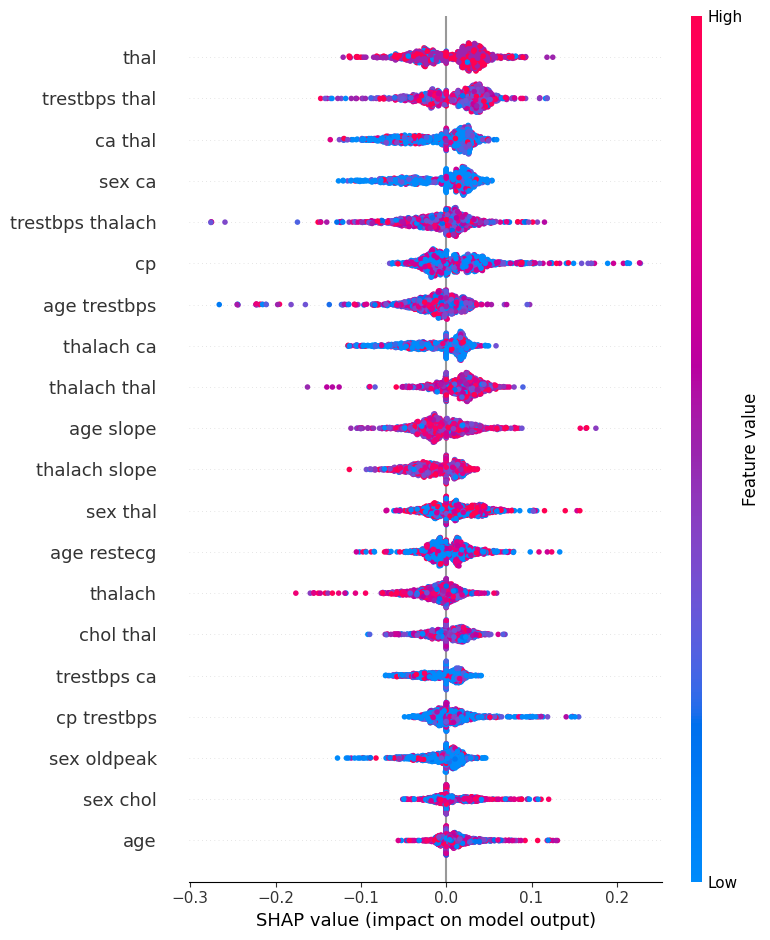

In [139]:
# Lets check the feature importance with SHAP values
import pickle
import shap
shap.initjs()

def open_shap_data():
    with open('background.pkl', 'rb') as f:
        background = pickle.load(f)
    with open('explainer.pkl', 'rb') as f:
        explainer = pickle.load(f)
    with open('shap_values.pkl', 'rb') as f:
        shap_values = pickle.load(f)
    return background, explainer, shap_values

# because of our large dataset (and low computational power), we will use background data to calculate the SHAP values
# summarize background data with 10 clusters

if open_shap_data() is None:
    background = X_train[np.random.choice(X_train.shape[0], 10, replace=False)]
    explainer = shap.KernelExplainer(best_svc.predict, background)
    shap_values = explainer.shap_values(X_train)
    with open('background.pkl', 'wb') as f:
        pickle.dump(background, f)
    with open('explainer.pkl', 'wb') as f:
        pickle.dump(explainer, f)
    with open('shap_values.pkl', 'wb') as f:
        pickle.dump(shap_values, f)
else:
    background, explainer, shap_values = open_shap_data()

shap.summary_plot(shap_values, X_train, feature_names=poly.get_feature_names_out())

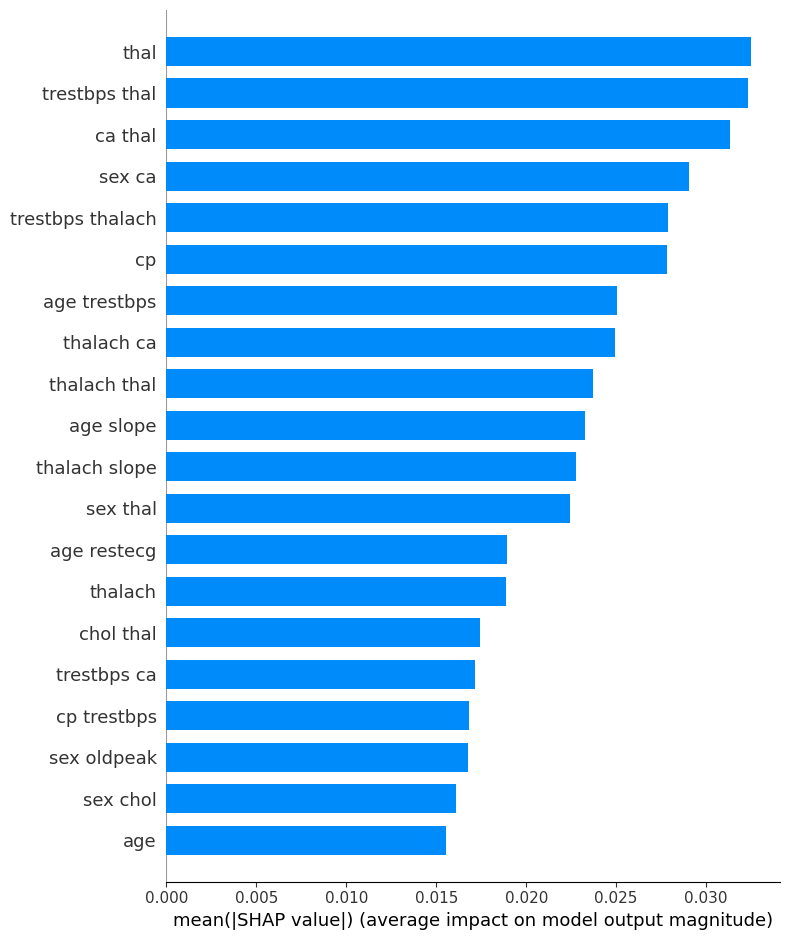

In [140]:
# lets look at the most important features with interaction effects
shap.summary_plot(shap_values, X_train, feature_names=poly.get_feature_names_out(), plot_type='bar')

This is interesting. The most important features is thal, trestbps * thal, ca * thal, sex * ca.

The most important features are the interaction effects of thal with other features.

In a real world scenario, we would want to talk to a professional to understand why thal is the most important feature.

When talking to a professional, we could learn more about our model and the data. This could lead to more feature engineering and a better model.

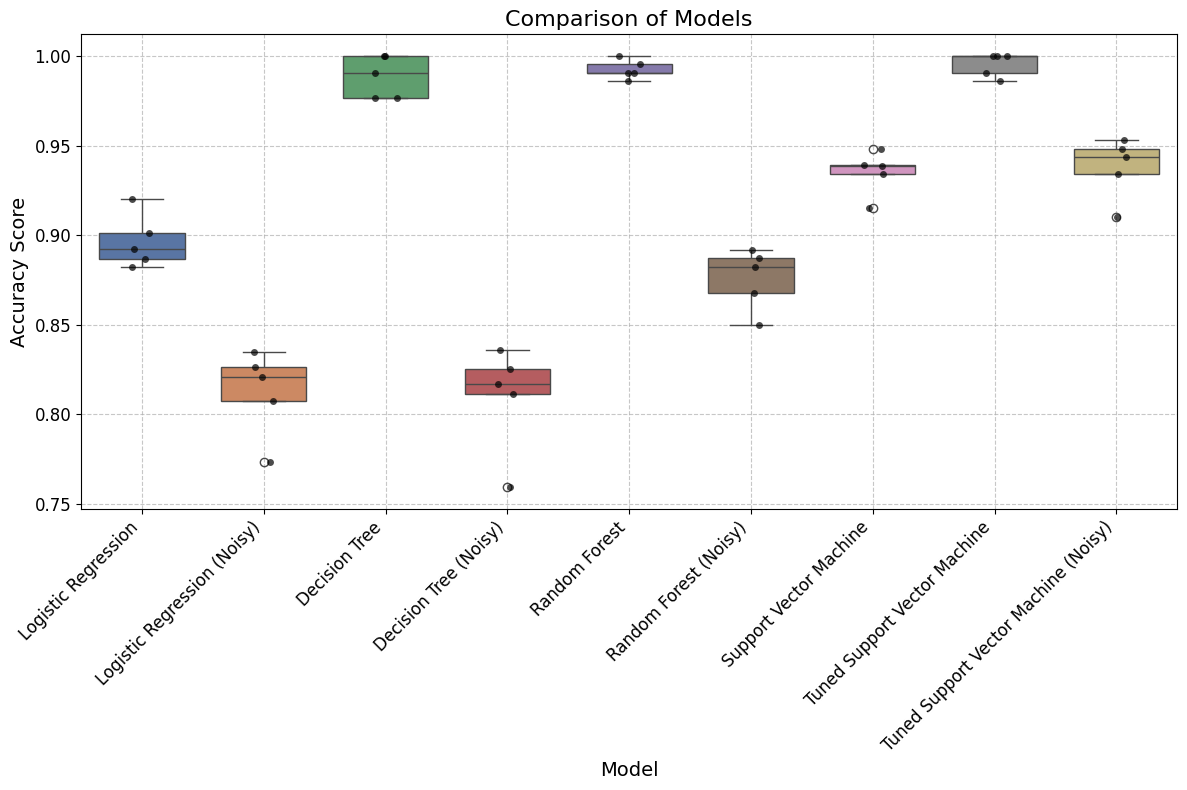

In [141]:
# Lets create a comparison of all the models using cross validation
# logistic regression
cv_results_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5)
# logistic regression with noisy data
cv_results_log_reg_noisy = cross_val_score(log_reg, X_train_noisy, y_train, cv=5)
# decision tree
cv_results_dt = cross_val_score(dt, X_train, y_train, cv=5)
# decision tree with noisy data
cv_results_dt_noisy = cross_val_score(dt, X_train_noisy, y_train, cv=5)
# random forest
cv_results_rf = cross_val_score(rf, X_train, y_train, cv=5)
# random forest with noisy data
cv_results_rf_noisy = cross_val_score(rf, X_train_noisy, y_train, cv=5)
# support vector machine
cv_results_svc = cross_val_score(svc, X_train, y_train, cv=5)
# best support vector machine
cv_results_best_svc = cross_val_score(best_svc, X_train, y_train, cv=5)
# best support vector machine with noisy data
cv_results_best_svc_noisy = cross_val_score(best_svc, X_train_noisy, y_train, cv=5)

cv_results_df = pd.DataFrame({
    'Logistic Regression': cv_results_log_reg,
    'Logistic Regression (Noisy)': cv_results_log_reg_noisy,
    'Decision Tree': cv_results_dt,
    'Decision Tree (Noisy)': cv_results_dt_noisy,
    'Random Forest': cv_results_rf,
    'Random Forest (Noisy)': cv_results_rf_noisy,
    'Support Vector Machine': cv_results_svc,
    'Tuned Support Vector Machine': cv_results_best_svc,
    'Tuned Support Vector Machine (Noisy)': cv_results_best_svc_noisy
})

plt.figure(figsize=(12, 8))
sns.boxplot(data=cv_results_df, width=0.7, palette='deep') # palettes: 
sns.stripplot(data=cv_results_df, color='black', size=5, alpha=0.7)
plt.title('Comparison of Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Conclusion

After data EDP, we started creating models to predict heart disease. We used logistic regression, decision tree, random forest, and support vector machine models to predict heart disease.

One interesting find was that the decision tree and random forest models were overfitting the data. We added noise to the data to see if the models were overfitting the data and they were (since the f1 score decrease heavliy).

We then found that the support vector machine model was a great foundation for a model. We hyperparameter tuned the model (to the extent of our computational power).

We then added polynomial features to the data to see if we could improve the model. We found that the model improved with the polynomial features.

The best model we created was the hyperparameter tuned support vector machine model with polynomial features. We make this inference based on the f1 score of the noisy data model, the cross-validation results, and the SHAP values.

The f1 score of the noisy data model was ~0.94 which is not bad. The cross-validation results showed that the model was consistent with an average accuracy score of ~0.94. 

We also used the SHAP values to understand the most important features in the data. This can help us understand the data better and improve the model.

In the future, more data to test the model would be extremely helpful. We can also use more feature engineering to improve the model. We can also use more computational power to hyperparameter tune the model to the best of our ability.

In the medical field, it is important to have a model that is not overfitting the data. This is because we want to make sure that the model is not making false predictions. We also want to make sure that the model is consistent.

I am aware that healthcare is protected by HIPAA and that the data I used is not real patient data. I used this data to practice my data science skills and to learn more about the medical field. 
I am not a doctor and I do not have a medical degree. I am not qualified to give medical advice. I am only qualified to give data science advice.

Thank you for reading my notebook.

# How the model would be used in a real-world scenario / integration with a web application

In [142]:
import pickle

with open('best_svc_model.pkl', 'wb') as file:
    pickle.dump((best_svc, scaler, poly), file)

def predict_heart_disease():
    age = float(input('Enter your age: '))
    sex = float(input('Enter your sex (1 = male, 0 = female): '))
    cp = float(input('Enter your chest pain type (0-3): '))
    trestbps = float(input('Enter your resting blood pressure: '))
    chol = float(input('Enter your serum cholesterol: '))
    fbs = float(input('Enter your fasting blood sugar > 120 mg/dl (1 = true, 0 = false): '))
    restecg = float(input('Enter your resting electrocardiographic results (0-2): '))
    thalach = float(input('Enter your maximum heart rate achieved: '))
    exang = float(input('Enter exercise induced angina (1 = yes, 0 = no): '))
    oldpeak = float(input('Enter your ST depression induced by exercise relative to rest: '))
    slope = float(input('Enter the slope of the peak exercise ST segment (0-2): '))
    ca = float(input('Enter the number of major vessels (0-3) colored by flourosopy: '))
    thal = float(input('Enter your thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect): '))

    X = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    with open('best_svc_model.pkl', 'rb') as file:
        model, scaler, poly = pickle.load(file)

    X_poly = poly.transform(X)

    X_poly_scaled = scaler.transform(X_poly)

    prediction = model.predict(X_poly_scaled)

    if prediction[0] == 0:
        result = 'No heart disease'
    else:
        result = 'Heart disease detected'

    return result

prediction = predict_heart_disease()
print('Prediction:', prediction)


ValueError: could not convert string to float: ''

# TEST 

In [144]:
with open('best_svc_model.pkl', 'wb') as file:
    pickle.dump((best_svc, scaler, poly), file)

def predict_heart_disease_dummy(X):
    with open('best_svc_model.pkl', 'rb') as file:
        model, scaler, poly = pickle.load(file)

    X_poly = poly.transform(X)

    X_poly_scaled = scaler.transform(X_poly)

    prediction = model.predict(X_poly_scaled)

    if prediction[0] == 0:
        result = 'No heart disease'
    else:
        result = 'Heart disease detected'

    return result

# pick 3 rows from the dataset where target = 0 and 3 rows where target = 1
# use the predict_heart_disease_dummy function to predict the target variable
# compare the predictions to the actual target variable

# 3 rows where target = 0
no_heart_disease = data[data['target'] == 0].head(3)
for index, row in no_heart_disease.iterrows():
    print(predict_heart_disease_dummy(row.drop('target').values.reshape(1, -1)))

# 3 rows where target = 1
heart_disease = data[data['target'] == 1].head(3)
for index, row in heart_disease.iterrows():
    print(predict_heart_disease_dummy(row.drop('target').values.reshape(1, -1)))


No heart disease
No heart disease
No heart disease
Heart disease detected
Heart disease detected
Heart disease detected


/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/jpaluska/Desktop/ds_project/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialF